In [1]:
import tushare as ts
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import warnings
warnings.filterwarnings("ignore")
# 设置token
ts.set_token('4167d168dd2c182108319b0f5fc93d66b21d5ccf2baa2af2a522b80d')
pro = ts.pro_api()
start_date = '2016-01-01'
end_date = '2023-01-01'
processed = pd.read_csv('datasets/processed_technical_indicators.csv')
# to date
processed['date'] = pd.to_datetime(processed['date'])
print('processed origin shape:',processed.shape)
# Shibor
df_shibor = pro.shibor(start_date=start_date, end_date=end_date)
df_shibor['date'] = pd.to_datetime(df_shibor['date'])
# drop
df_shibor = df_shibor.drop(['on', '1w', '2w', '3m', '6m', '9m', '1y'], axis=1)
print(df_shibor.head())
# merge
processed = pd.merge(processed, df_shibor, on='date', how='left')
# isna
print('isna:',processed.isna().sum().sum())
print('prcessed shape added Shibor:',processed.shape)
print(processed.date.nunique())

processed origin shape: (85150, 17)
        date     1m
0 2022-12-30  2.346
1 2022-12-29  2.340
2 2022-12-28  2.332
3 2022-12-27  2.321
4 2022-12-26  2.306
isna: 0
prcessed shape added Shibor: (85150, 18)
1703


# Add 3 macro indecies

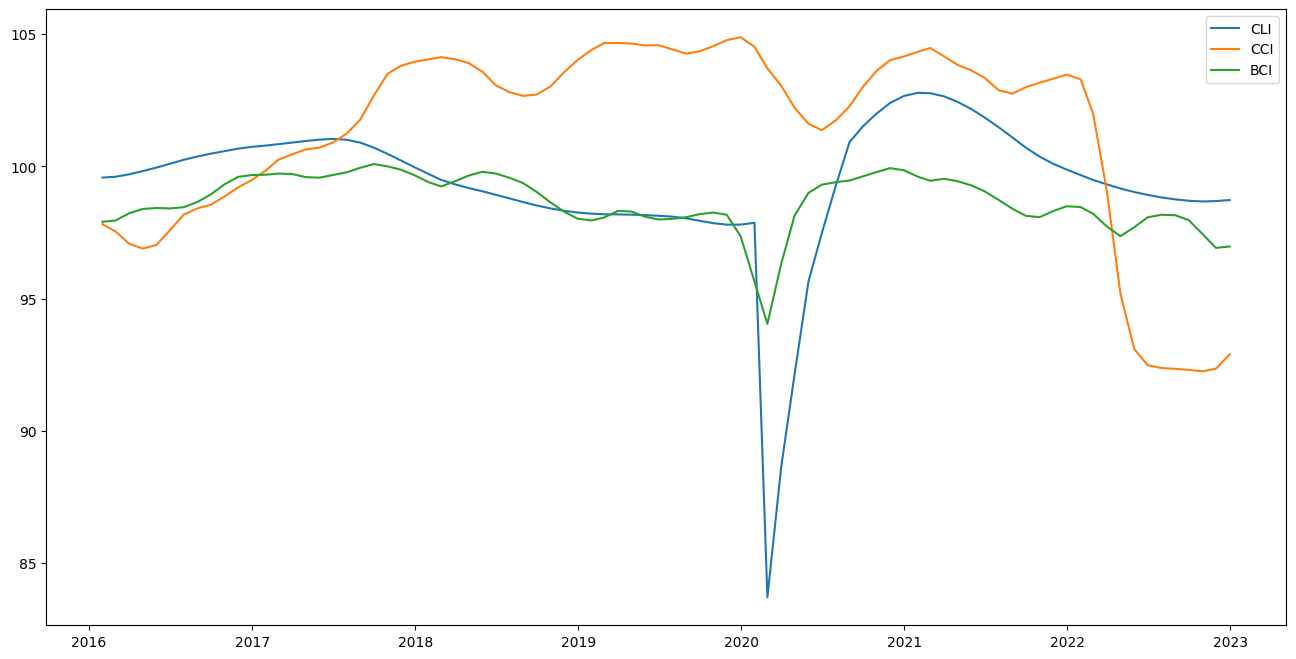

In [2]:
macro_index_df = pd.read_csv('datasets/macro_index_df.csv')
# drop TIME
macro_index_df = macro_index_df.drop(['TIME'], axis=1)
macro_index_df['date'] = pd.date_range(start='2016-01-01', end='2022-12-31', freq='M')

# plot CLI, CCI, BCI
plt.figure(figsize=(16, 8))
plt.plot(macro_index_df.date, macro_index_df.CLI, label='CLI')
plt.plot(macro_index_df.date, macro_index_df.CCI, label='CCI')
plt.plot(macro_index_df.date, macro_index_df.BCI, label='BCI')
plt.legend()
plt.show()



In [73]:
processed

,date,tic,open,high,low,close,volume,day,macd,boll_ub,boll_lb,rsi_30,cci_30,dx_30,close_30_sma,close_60_sma,turbulence,1m
0,2016-01-04,000001.SZ,12.00,12.03,11.23,11.33,563497.87,0,0.000000,11.463995,11.266005,100.000000,-66.666667,100.000000,11.330000,11.330000,0.000000,3.001
1,2016-01-04,000069.SZ,8.85,8.87,7.95,7.95,443112.09,0,0.000000,11.463995,11.266005,100.000000,-66.666667,100.000000,7.950000,7.950000,0.000000,3.001
2,2016-01-04,000157.SZ,5.35,5.37,4.95,4.96,604672.43,0,0.000000,11.463995,11.266005,100.000000,-66.666667,100.000000,4.960000,4.960000,0.000000,3.001
3,2016-01-04,000725.SZ,2.97,2.98,2.77,2.78,4144472.79,0,0.000000,11.463995,11.266005,100.000000,-66.666667,100.000000,2.780000,2.780000,0.000000,3.001
4,2016-01-04,000768.SZ,25.31,25.74,22.51,22.87,437306.06,0,0.000000,11.463995,11.266005,100.000000,-66.666667,100.000000,22.870000,22.870000,0.000000,3.001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85145,2022-12-30,601888.SH,217.88,218.72,213.05,216.03,87758.09,4,5.620659,224.683895,207.796105,56.830854,47.540935,28.127037,207.040000,195.025000,31.542668,2.346
85146,2022-12-30,601939.SH,5.62,5.65,5.59,5.63,402966.14,4,0.025256,5.675902,5.486098,54.356751,93.917840,25.287411,5.551667,5.478667,31.542668,2.346
85147,2022-12-30,601985.SH,6.00,6.03,5.98,6.00,307394.69,4,-0.060427,6.449573,5.826427,44.750845,-102.267588,1.906195,6.179000,6.151000,31.542668,2.346
85148,2022-12-30,601988.SH,3.17,3.17,3.15,3.16,1220204.86,4,0.012785,3.179761,3.113239,55.199976,82.995951,31.943147,3.132667,3.089500,31.542668,2.346


In [3]:
# 根据每月合并
macro_index_df['month'] = macro_index_df['date'].dt.month
macro_index_df['year'] = macro_index_df['date'].dt.year
macro_index_df['month_year'] = macro_index_df['month'].astype(str) + '-' + macro_index_df['year'].astype(str)
macro_index_df = macro_index_df.drop(['month', 'year','date'], axis=1)

processed['month'] = processed['date'].dt.month
processed['year'] = processed['date'].dt.year
processed['month_year'] = processed['month'].astype(str) + '-' + processed['year'].astype(str)
processed = processed.drop(['month', 'year'], axis=1)

# merge
processed = pd.merge(processed, macro_index_df, on='month_year', how='left')
print('processed shape added macro index:',processed.shape)
print('isna:',processed.isna().sum().sum())
print(processed.date.nunique())


processed shape added macro index: (85150, 22)
isna: 0
1703


In [ ]:
# save
processed.to_csv('datasets/processed_tech_macro.csv', index=False)

# Add pb into processed

In [4]:
# add turnover_rate and pb
df_pb = pd.DataFrame()
for tic in processed.tic.unique():
    df_pb = df_pb.append(
        pro.daily_basic(ts_code=tic,
                        start_date=start_date,
                        end_date=end_date,
                        fields='ts_code,trade_date,turnover_rate,pb'))
# rename trade_date to date, ts_code to tic
df_pb = df_pb.rename(columns={'trade_date':'date', 'ts_code':'tic'})
# date
df_pb['date'] = pd.to_datetime(df_pb['date'], format='%Y%m%d')
# concate 
processed = pd.merge(processed, df_pb, on=['date', 'tic'], how='left')
print(processed.shape)
print(processed.isnull().sum())
processed.sample(5)

(85150, 24)
date             0
tic              0
open             0
high             0
low              0
close            0
volume           0
day              0
macd             0
boll_ub          0
boll_lb          0
rsi_30           0
cci_30           0
dx_30            0
close_30_sma     0
close_60_sma     0
turbulence       0
1m               0
month_year       0
CLI              0
CCI              0
BCI              0
turnover_rate    0
pb               0
dtype: int64


,date,tic,open,high,low,close,volume,day,macd,boll_ub,...,close_30_sma,close_60_sma,turbulence,1m,month_year,CLI,CCI,BCI,turnover_rate,pb
48498,2019-12-24,601988.SH,3.67,3.68,3.66,3.67,341212.62,1,0.008937,3.703422,...,3.638333,3.655000,18.935718,2.9960,12-2019,97.79501,104.880440,97.355259,0.0162,0.6642
1382,2016-02-17,601288.SH,2.94,2.98,2.93,2.97,1380607.51,2,-0.034024,3.168680,...,3.040000,3.040000,0.000000,2.9380,2-2016,99.60450,97.539000,97.949399,0.0470,0.8821
13624,2017-02-17,600660.SH,18.94,18.98,18.65,18.70,122480.52,4,0.139706,19.192546,...,18.552333,18.427500,34.779009,4.0652,2-2017,100.83670,100.249836,99.724677,0.6115,2.7811
34922,2018-11-14,600519.SH,569.96,569.96,552.55,555.10,41766.83,2,-26.394339,683.146435,...,621.270667,642.943000,24.095679,2.6850,11-2018,98.31968,103.549916,98.286563,0.3325,6.8117
64651,2021-04-27,000069.SZ,9.46,9.66,9.40,9.53,608487.25,1,0.087835,10.808031,...,9.796000,8.755833,62.318827,2.4910,4-2021,102.43800,103.840677,99.437719,0.8623,1.0073


In [ ]:
processed.to_csv('datasets/processed_tech_macro_pb.csv', index=False)

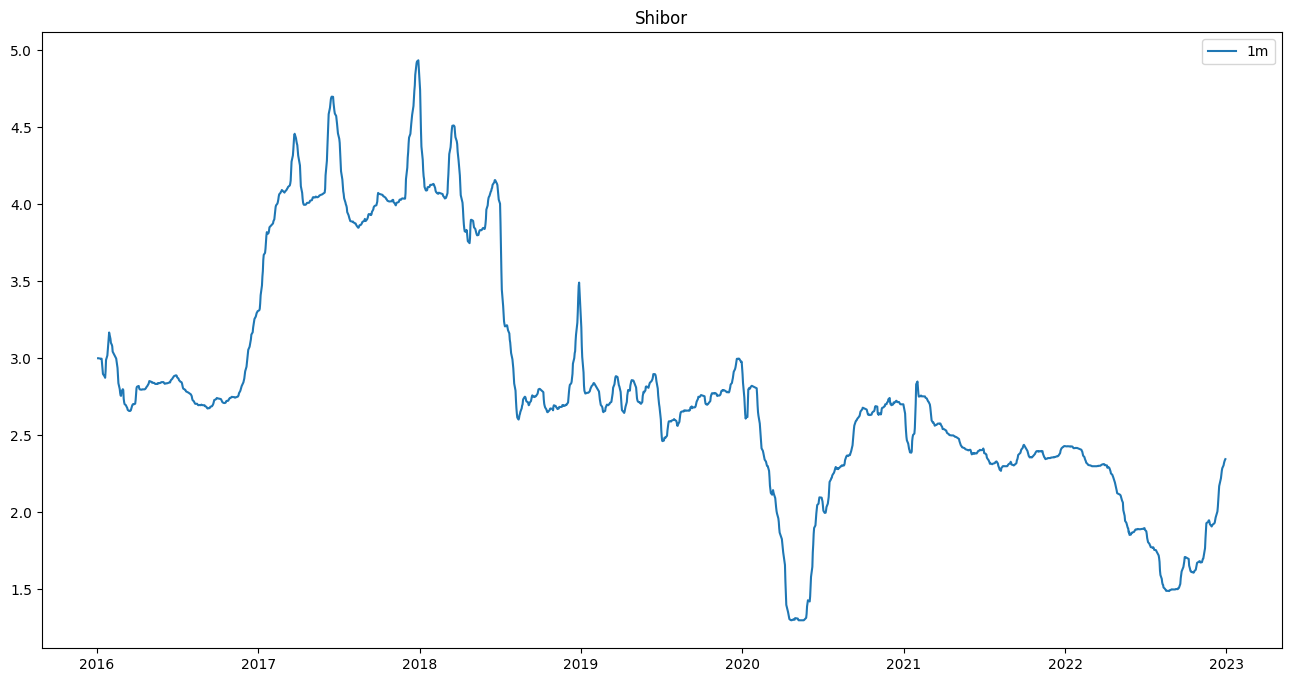

In [18]:
# plot
plt.figure(figsize=(16, 8))
# plt.plot(df_shibor['date'], df_shibor['1y'], label='1y')
# plt.plot(df_shibor['date'], df_shibor['1w'], label='1w')
plt.plot(df_shibor['date'], df_shibor['1m'], label='1m')
# plt.plot(df_shibor['date'], df_shibor['3m'], label='3m')
# plt.plot(df_shibor['date'], df_shibor['6m'], label='6m')
# 9m
# plt.plot(df_shibor['date'], df_shibor['9m'], label='9m')
plt.legend()
plt.title('Shibor')
plt.show()


# merge 3 macro indecies

In [54]:
CLI_df = pd.read_csv('datasets/CLI.csv')
CCI_df = pd.read_csv('datasets/CCI.csv')
BCI_df = pd.read_csv('datasets/BCI.csv')
# drop
CLI_df = CLI_df.drop(['INDICATOR','LOCATION', 'SUBJECT', 'MEASURE', 'FREQUENCY', 'Flag Codes'], axis=1)
CCI_df = CCI_df.drop(['INDICATOR','LOCATION', 'SUBJECT', 'MEASURE', 'FREQUENCY', 'Flag Codes'], axis=1)
BCI_df = BCI_df.drop(['INDICATOR','LOCATION', 'SUBJECT', 'MEASURE', 'FREQUENCY', 'Flag Codes'], axis=1)
# rename
CLI_df = CLI_df.rename(columns={'Value':'CLI'})
CCI_df = CCI_df.rename(columns={'Value':'CCI'})
BCI_df = BCI_df.rename(columns={'Value':'BCI'})
# drop na
CLI_df = CLI_df.dropna()
CCI_df = CCI_df.dropna()
BCI_df = BCI_df.dropna()

# merge 3 table into macro_index_df
macro_index_df = pd.merge(CLI_df, CCI_df, on='TIME', how='left')
macro_index_df = pd.merge(macro_index_df, BCI_df, on='TIME', how='left')
print('isna:',macro_index_df.isna().sum())
# to csv
macro_index_df.to_csv('datasets/macro_index_df.csv', index=False)

isna: TIME    0
CLI     0
CCI     0
BCI     0
dtype: int64


OutOfBoundsDatetime: Out of bounds nanosecond timestamp: 1-01-16 00:00:00 present at position 0